# 数据科学竞赛入门



> 前言：这篇文章是翻译文章，主要内容是通过实战「泰坦尼克号的数据科学解决方案」给小白讲解如何入门数据科学竞赛，例如：Kaggle。写得很好，让我们开始吧。



## 工作流程

解决问题的流程主要有以下七个阶段：

+ 问题的定义（Question or problem definition）

+ 得到训练数据和测试数据（Acquire training and testing data）

+ Wrangle, 准备清洗数据（Wrangle, prepare, cleanse the data）

+ 分析，识别模式并探索数据（Analyze, identify patterns, and explore the data）

+ 建模，预测和解决问题（Model, predict and solve the problem）

+ 可视化，报告和呈现问题解决步骤和最终解决方案（Visualize, report, and present the problem solving steps and final solution）

+ 提交结果（Supply or submit the results）



以上流程只是一般情况，还有其他的例外

+ 我们可以结合多个工作流程，通过可视化分析数据
+ 早于指示的顺序提前某一个阶段。比如我们可以提前分析数据在 wrangling 之后
+ 在工作流程中多次重复一个阶段。可视化阶段可以重复多次
+ 跳过某些阶段。 We may not need supply stage to productize or service enable our dataset for a competition.



## 问题和问题的定义（Question and problem definition）



这些像 Kaggle 的竞赛网站提出问题的同时会提供训练数据集和测试数据集。Titanic Survival competition 的描述在***[这里](https://www.kaggle.com/c/titanic)***



> 根据那些在泰坦尼克号灾难，幸存或没有幸存的乘客的一组训练样本，我们的模型可以根据不知道是否幸存的测试数据集，判断是否这些在测试数据集的乘客能否幸存



我们可能还希望对我们问题的领域有一些早期的了解。描述在***[这里](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook)***。重点在这



+ 1912 年 4 月 15 日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，在 2224 名乘客和机组人员中造成 1502 人死亡。也就是说幸存率为 32%
+ 造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。
+ 对于幸存者来说能活下来有幸存因素，但是有些人比其他人更容易幸存，例如妇女、儿童和上流社会的人



## 工作流程目标

数据科学解决方案的工作流程解决了七个主要目标



+ **分类** 

  我们可能想对样本进行分类。我们可能还想了解不同类的含义以及与我们目标的相关性
  

+ **相关**

  可以基于训练数据集内的可用特征来解决问题。数据集中的哪些功能对我们的解决方案目标有重大贡献？从统计学上讲，功能和解决方案目标之间是否存在相关性？随着特征值的变化，解决方案状态也会发生变化，反之亦然。这可以针对给定数据集中的数字和分类特征进行测试。我们可能还希望确定除后续目标和工作流程阶段的生存之外的特征之间的相关性。关联某些功能可能有助于创建，完成或更正特征。


+ **转换**

  对于建模阶段，需要准备数据。根据模型算法的选择，可能需要将所有特征转换为数值等效值。例如，将文本分类值转换为数值。


+ **完成**

  数据准备可能还需要我们估计要素中的任何缺失值。当没有缺失值时，模型算法可能最有效。


+ **更正**


+ **创造**


+ **制图**

  

## 开始


In [11]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 得到数据

我们可以通过 Pandas 帮助我们得到文件里的数据集，开始的时候我们把训练数据和测试数据放进 Pandas DataFrames。我们把这些数据合并在一起处理。

In [12]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

### 通过描述数据分析

Pandas 也能完成下述问题



+ **数据集中有有哪些特征？**

In [13]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


+ **数据集中有哪些特征是可以用来分类的**

这些值将样本分类为类似样本的集合。在分类特征中，基于名义，序数，比率或区间的值？除此之外，这有助于我们选择适当的可视化图。

**可以用来分类的类别：Survived, Sex, Embarked. Ordinal: Pclass.**

+ **数据集中有哪些特征是数字**

哪些特征是数字的？这些值随样品而变化。在数值特征中，值是离散的，连续的还是基于时间序列的？除此之外，这有助于我们选择适当的可视化图。



**连续的特征：Age, Fare                 离散的数据：SibSp, Parch**

In [18]:
# 预览数据
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


+ 哪些特征混合了不同的数据类型

在同一个特征里面既有数字、也有字母，这些是需要更正的候选数据

**Ticket 是数字和字母数字数据类型的混合。Cabin 是字母和数字**



+ 哪些特征可能包含错误或拼写错误？

对于大型数据集来说，这很难检查，但是从较小的数据集中查看一些样本可能只是告诉我们，哪些功能可能需要更正。



**Name 可能包含错误或拼写错误，因为有几种方法可用于描述名称，包括标题，圆括号和用于替代或短名称的引号**

In [17]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


+ **有哪些特征值包含空数据**

这些值需要改正

Cabin > Age > Embarked 特征按训练数据集的顺序包含许多空值。

Cabin > Age 在测试数据集上不完整。


+ **所有特征的数据类型是什么？**

转换目标的时候对我们有帮助。

有七个特征是证书或者浮点数，在测试集中只有六个。

有五个特征值是字符串



In [19]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

+ **样本中数值特征值的分布是什么？**

这个问题的答案帮助我们在其他早期的见解中，判断实际问题领域中训练数据有多少代表性。

    + 一共有 891 个样本，或者说占泰坦尼克号乘客数（2224）的百分之四十。
    + Survived 是可分类特征只有 0 1 两个值
    + 数据中幸存率大约是 38% 代表着实际幸存率 32%
    + 绝大多数乘客（> 75%）没有带小孩或者父母
    + 30％ 的乘客有兄弟姐妹和/或配偶
    + 票价差异很大，很少有乘客（< 1％）支付高达 512 美元
    + 年龄在65-80岁之间的老年乘客（< 1％）很少

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ **分类特征的分布是什么？**

名称在整个数据集中是唯一的（count = unique = 891）

性别变量为两个可能的值，男性为65％（top = male，freq= 577 / (count = 891)）。

Cabin 在样本中有几个副本。或者，几个乘客共用一个 Cabin。

Embarked 有三个可能的值，其中 S 最多

Ticket 有很高的重复率（22% unique=681）

In [22]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Drazenoic, Mr. Jozef",male,347082,G6,S
freq,1,577,7,4,644


### 基于数据分析的假设

我们基于迄今为止所做的数据分析得出以下假设。我们可以在采取适当行动之前进一步验证这些假设。

+ **相关性**

我们想知道每个特征与生存的相关性。我们想在项目的早期完成这个，然后让这些快速关联与在之后模型关联中相匹配。

+ **补全**

我们可能希望补全年龄特征，因为它与生存明确相关

+ **更正**


1. Ticket 特征可能从我们分析中删除，因为重复率太高。而且与存活可能没有太高的相关性
2. Cabin 特征可能会因为高度不完整而被删除
3. PassengerId 可能会从训练数据集中删除，因为它对生存没有贡献
4. Name 特征不是很标准，对生存的贡献不是很大，所以可能被删除


+ **创造**


1. 我们可能想要创建一个名为 Family 的基于 Parch 和 SibSp 的新特征，以获得船上家庭成员的总数。
2. 我们可能设计 Name 特征以将 Title 提取为新特征。
3. 我们可能创建一个新的特征 Age bands。将连续的数字特征变为用序数可分的特征
4. 我们可能也想创建一个 Fare（票价）范围，如果对我们的分析确实会有帮助的话


+ **分类**

我们还可以根据前面提到的问题描述添加我们的假设。

1. 女性（Sex = female）更有可能幸存下来。
2. 儿童（Age < ？）更有可能幸存下来。
3. 上流社会的乘客（Pclass = 1）更有可能幸存下来。


### 通过旋转功能进行分析（没有看懂）

为了确认我们的一些观察和假设，我们可以通过相互转动特征来快速分析我们的特征相关性。我们只能在此阶段为没有任何空值的功能执行此操作。对于分类（性别），序数（Pclass）或离散（SibSp，Parch）类型的特征，这样做也是有意义的。

+ Pclass 我们观察到一个重要的相关性（> 0.5）在 Pclass = 1 与 存活之间。我们决定在我们的模型中包含此功能。

+ Sex 我们在问题定义中确认（Sex=female）的生存率非常高，为74％（分类＃1）。
+ SibSp 和 Parch 这些特征对于某些值具有零相关性。最好从这些单独的特征中导出一个特征或一组特征（创建＃1）。


In [27]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [28]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [29]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [30]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 通过可视化分析数据

现在我们可以继续使用可视化来确认我们的一些假设来分析数据。

+ **关联数字特征**

让我们首先了解数值特征与我们的解决方案目标（生存）之间的相关性。


直方图可用于分析像 Age 这样的连续数值变量，其中条带或范围将有助于识别有用的模式。直方图可以使用自动定义的区间或等距离范围来指示样本的分布。这有助于我们回答与特定宽度相关的问题（婴儿的生存率是否更高？）

请注意，直方图可视化中的 x 轴表示样本或乘客的数量。（Note that x-axis in historgram visualizations represents the count of samples or passengers）这句话翻译不出来。

**观察到**

+ 婴儿（年龄<= 4）的存活率很高。
+ 最年长的乘客（年龄= 80岁）幸免于难。
+ 大量15-25岁的人没有活下来。
+ 大多数乘客年龄在15-35岁之间。

**结论**

这个简单的分析给后续的工作流程阶段证实了我们的判断假设。


+ 我们应该在模型训练中考虑 Age（我们的假设分类＃2）
+ 填充空值的 Age 功能（填充＃1）
+ 我们应该创建年龄组（创建＃3）。

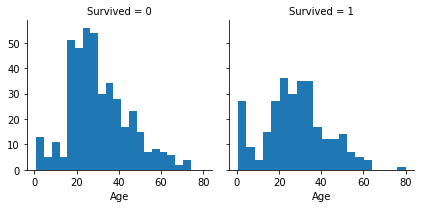

In [31]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### 关联数字和有序特征

我们可以使用单个图组合多个特征来识别相关性。这可以通过具有数值的数字和分类特征来完成。

**观察到**
+ Pclass = 3 有大多数乘客，但大多数人没有幸存。确认我们的分类假设＃2。
+ Pclass = 2 和 Pclass = 3 的婴儿乘客大部分幸存下来。进一步限定了我们的分类假设＃2
+ Pclass = 1的大多数乘客幸免于难。确认我们的分类假设＃3。
+ Pclass 在乘客年龄分布方面有所不同。

**判断**

考虑使用 Pclass 进行模型训练。


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


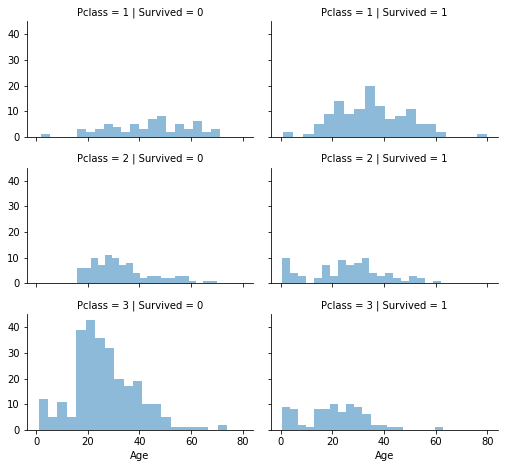

In [32]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### 关联分类特征

现在我们可以将分类特征与我们的解决方案目标相关联。

**观察到**

+ 女性乘客的生存率远高于男性。确认分类（＃1）。
+ 在 Embarked = C 中的例外情况，其中男性具有更高的存活率。这可能是 Pclass 和 Embarked 之间的相关性，反过来是 Pclass 和 Survived，不一定是 Embarked 和 Survived 之间的直接相关。
+ 相比较 Pclass = 2 C, Q 码头上，男性在 Pclass = 3 的存活率更高。（填充 #2）
+ 登船口岸的 Pclass = 3和男性乘客的生存率各不相同。相关（＃1）。

**结论**

+ 将性别功能添加到模型训练中。
+ 完成并添加 Embarked 特征以进行模型训练。

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/tenshine/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


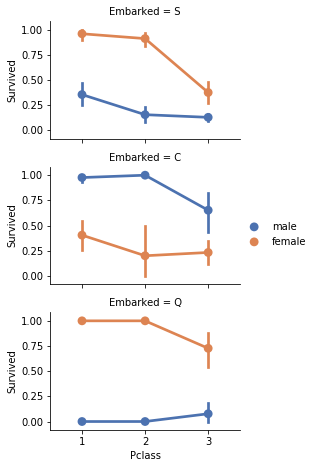

In [33]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

关联分类和数字特征

我们可能还想关联分类特征（使用非数字值）和数字特征。我们可以考虑关联 Embarked （非数字类别），Sex（非数字类别），Fare（数值连续）和 Survived （数字类别）


**观察**

+ 付费较高的乘客有更好的生存。证实我们创建（＃4）票价范围的假设。+ 登船港与生存率相关。证实 相关（＃1）和 完成（＃2）。

**结论**

+ 考虑绑定票价特征

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


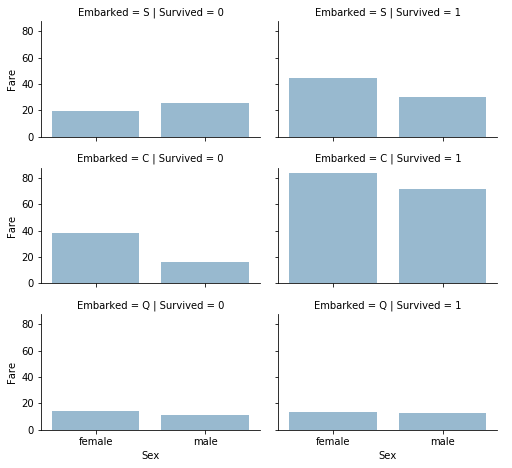

In [34]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 整理数据

我们收集了有关数据集和解决方案要求的若干假设和决策。到目前为止，我们没有必要更改单个功能或值来实现这些功能。现在让我们执行我们的决策和假设，以纠正，创建和完成目标

### 通过丢弃数据来纠正


这是一个很好的起始目标。通过删除特征，我们处理的数据点更少。加速我们的笔记本电脑并简化分析。根据我们的假设和决定，我们希望放弃Cabin（纠正＃2）和Ticket（纠正＃1）特征。请注意，在适用的情况下，我们同时对训练和测试数据集执行操作以保持一致。

In [35]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

从已有的数据提取新特征

我们想要分析是否可以设计 Name 来提取标题并测试标题和生存之间的相关性，然后再删除 Name 和 PassengerId 特征。

在下面的代码中，我们使用正则表达式提取标题特征。 RegEx模式（\ w \.）匹配名称功能中以点字符结尾的第一个单词。 expand = False 标志返回一个 DataFrame。

**观察**

当我们绘制 Title，Age 和 Survived 时，我们注意到以下观察结果。

+ 大多数的 Title 与年龄组挂钩。例如：Master title 的年龄均值为 5 年。

+ 标题和年龄段的生存率略有不同。

+ 某些头衔大多存活下来（Mme，Lady，Sir）或者没有（Don，Rev，Jonkheer）。

**结论**

我们决定保留新的 Title 特征以进行模型训练。


In [38]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


我们可以用更常见的名称替换许多标题或将它们归类为 Rare。

In [39]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


我们可以将分类标题转换为序数

In [40]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以安全地从训练和测试数据集中删除 Name 特征。我们也不需要训练数据集中的 PassengerId 特征。

In [41]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 转换分类特征

现在我们可以将包含字符串的特征转换为数值。这是大多数模型算法所必需的。这样做也将有助于我们实现功能完成目标。让我们首先将性别特征转换为名为 Gender 的新功能，其中 female = 1，male = 0。

In [42]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 补充数字连续特征

现在我们应该开始估计和完成缺少值或空值的特征。我们将首先针对 Age 特征执行此操作。我们可以考虑三种方法来完成数值连续特征。

1. 一种简单的方法是在均值和标准差之间生成随机数。


2. 猜测缺失值的更准确方法是使用其他相关特征。在我们的例子中，我们注意到 Age，Gender 和 Pclass 之间的相关性。使用中值来猜测年龄。（Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. ）


3. 结合方法 1 和 2.因此，不是根据中位数猜测年龄值，而是使用平均值和标准值之间的随机数偏差，基于 Pclass 和 Gender 组合的集合。

方法 1 和 3 将随机噪声引入我们的模型。多次执行的结果可能会有所不同。我们更喜欢方法2。

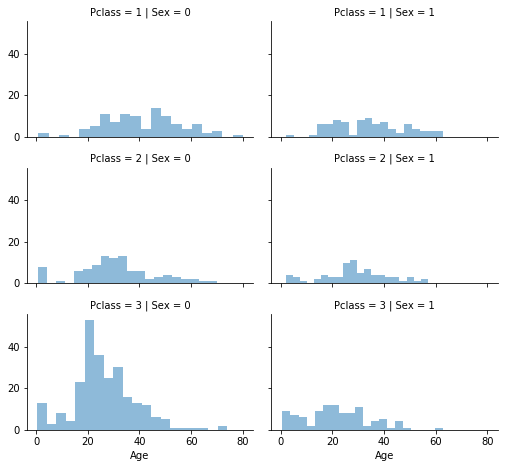

In [43]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

让我们首先准备一个空数组，以包含基于 Pclass x Gender 组合的猜测Age 值。

In [44]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

现在我们迭代Sex（0 或 1）和 Pclass（1,2,3）来计算六种组合的 Age 的猜测值。

In [45]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


让我们创建 Age band 并确定与 Survived 的相关性。

In [46]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


让我们基于这些 bands 替换 Age

In [47]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


我们无法删除 AgeBand 特征

In [48]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 创建组合现有特征的新特征

我们可以创建一个新的特征 FamilySize。这个新的特征结合 Parch 和 SibSp。这个使我们可以丢弃 Parch 和 SibSp 特征

In [49]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


我们可以创建另一个名为 IsAlone 的特征

In [51]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


让我们放弃Parch，SibSp 和 FamilySize 特征，转而使用 IsAlone 特征

In [52]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们还可以创建一个结合 Pclass 和 Age 的人造特征。

In [53]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


+ **补充分类特征**

Embarked 根据登船港口获取 S Q C 值，我们的训练数据集有两个缺失值。我们只是填上最常见的值

In [54]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [55]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### 将分类特征转换为数字

我们现在可以通过创建新的数字端口特征来转换 Embarked 填写的特征。

In [56]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### 快速填充并转换成数据特征

现在，我们可以使用模式为测试数据集中的单个缺失值填充 Fare 特征，以获取此功能最常出现的值。我们在一行代码中完成此操作。

请注意，由于我们只替换单个值，因此我们不会创建中间新特征或进行任何进一步的相关分析以猜测缺失特征。完成目标实现了模型算法对非空值进行操作的期望要求。

我们可能还希望将票价四舍五入到两位小数，因为它代表货币。

In [57]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


我们不能创建 FareBand 特征

In [58]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


转换 Fare 特征到序数值依靠上面的 FareBand

In [59]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


看看测试数据

In [60]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 建模，预测和解决问题

现在我们准备训练模型并预测所需的解决方案。有 60 种预测建模算法可供选择。我们必须了解问题的类型和解决方案要求，以缩小到我们可以评估的少数几个模型。我们的问题是分类和回归问题。我们想要确定输出（生存与否）与其他变量或特征（性别，年龄，港口......）之间的关系。我们还开展了一种机器学习，称为监督学习，因为我们正在使用给定的数据集训练我们的模型。有了这两个标准 - 监督学习加分类和回归，我们可以将我们选择的模型缩小到几个。这些包括：

+ Logistic Regression
+ KNN or k-Nearest Neighbors
+ Support Vector Machines
+ Naive Bayes classifier
+ Decision Tree
+ Random Forrest
+ Perceptron
+ Artificial neural network
+ RVM or Relevance Vector Machine

In [61]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic 回归是在工作流程中应该尽早尝试的有用模型。 Logistic 回归通过使用逻辑函数（累积逻辑分布）估计概率来测量分类因变量（特征）与一个或多个自变量（特征）之间的关系。

In [62]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

我们可以使用 Logistic 回归来验证我们对功能创建和完成目标的假设和决策。这可以通过计算决策函数中的特征的系数来完成。

正系数增加了响应的对数几率（从而增加了概率），负系数降低了响应的对数几率（从而降低了概率）

+ 性别是最高的正系数，暗示随着性别值的增加（男性：0到女性：1），存活率= 1的概率增加最多。

+ 相反，随着 Pclass 的增加，Survived = 1 的概率降低最多。

+ 而且，Age * Class 是一个很好的人工模型，因为它与Survived具有第二高的负相关。

+ Title 是第二高正相关。

In [63]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


接下来，我们使用支持向量机进行建模，支持向量机是监督学习模型，具有相关的学习算法，用于分析用于分类和回归分析给定一组训练样本，每个训练样本被标记为属于两个类别中的一个或另一个，SVM 训练算法构建将新测试样本分配给一个类别或另一个类别的模型，使其成为非概率二元线性分类器。

请注意，该模型生成的置信度得分高于 Logistic Regression 模型。

In [64]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

在模式识别中，k-Nearest Neighbors 算法（或简称k-NN）是用于分类和回归的非参数方法。样本按其邻居的多数票进行分类，样本被分配给其k 个最近邻居中最常见的类（k是正整数，通常很小）。如果k = 1，则简单地将对象分配给该单个最近邻居的类。参考维基百科。 KNN 置信度得分优于 Logistic 回归，但比 SVM 差。

In [73]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

在机器学习中，朴素贝叶斯分类器是一系列简单的概率分类器，它基于贝叶斯定理应用特征之间的强（Naive）独立假设。朴素贝叶斯分类器具有高度可扩展性，在学习问题中需要多个变量（特征）数量的线性参数

In [74]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

感知器是用于二元分类器的监督学习的算法（可以决定由数字向量表示的输入是否属于某个特定类的函数）。它是一种线性分类器，即一种分类算法，其基于将一组权重与特征向量组合的线性预测器函数进行其预测。该算法允许在线学习，因为它一次一个地处理训练集中的元素。

In [75]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

In [76]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [77]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.45

该模型使用决策树作为预测模型，将特征（树枝）映射到关于目标值（树叶）的结论。目标变量可以采用有限值集的树模型称为分类树;在这些树结构中，叶子表示类标签，分支表示导致这些类标签的特征的连接。目标变量可以采用连续值（通常是实数）的决策树称为回归树。


模型置信度得分在评估的模型中最高

In [78]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

下一个模型「随机森林」是最受欢迎的模型之一。随机森林或随机决策森林是用于分类，回归和其他任务的集成学习方法，其通过在训练时构建多个决策树（n_estimators = 100）并输出作为类的模式的类（分类）来操作。或者表示各树的预测（回归）。参考维基百科。到目前为止评估的模型中模型置信度得分最高。我们决定使用此模型的输出（Y_pred）来创建竞赛结果提交。

In [79]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## 模型评估

我们现在可以对所有模型的评估进行排序，以便为我们的问题选择最佳模型。虽然决策树和随机森林得分相同，但我们选择使用随机森林来纠正决策树过度拟合其训练集的习惯。

In [80]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
6,Stochastic Gradient Decent,78.45
5,Perceptron,78.00
4,Naive Bayes,72.28


In [81]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

我们向竞赛网站 Kaggle 提交的结果为 6,082 个参赛作品中排名  3,883 位。在比赛开始时，这个结果是指示性的。此结果仅考虑提交数据集的一部分。对我们的第一次尝试来说不错。